In [ ]:
pip install tensorflow

In [ ]:
pip list

In [ ]:
pip install opencv-python

In [ ]:
pip install mediapipe

In [ ]:
pip install sklearn

In [ ]:
pip install matplotlib

In [ ]:
pip list

In [ ]:
#importing libraries
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

### Taking keypoints using mp holistic

In [2]:
mp_holistic = mp.solutions.holistic #Holistic Model(to make out detection)
mp_drawing = mp.solutions.drawing_utils #drawing utilty (to draw them)

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #color coversion bgr to rgb
    image.flags.writeable = False                  # image is no longer writable to save little space
    results = model.process(image)                 #make prediction
    image.flags.writeable = True                   #now its writable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #again conversion to original color
    return image , results

In [4]:
#function for rendering the frame
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) #Drawing face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) #Drwaing pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #Drawing left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #Drawing right hand connections

In [5]:
# Creating another function for rendering in a better way
def draw_styled_landmarks(image, results):
    #Drawing face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1) 
                             )
    #Drwaing pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2) 
                             ) 
    #Drawing left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    #Drawing right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
# accessing webcam through mediapipe to take keypoinys
cap=cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        #read feed
        ret,frame=cap.read()

        #make Detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        #Draw landmarks
        draw_styled_landmarks(image, results)
        

        #show to screen
        cv2.imshow('OpenCV Feed', image)

        #break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()   
    cv2.destroyAllWindows()   #closing the frame


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
len(results.right_hand_landmarks.landmark)

21

In [8]:
len(results.face_landmarks.landmark)

468

In [10]:
results

mediapipe.python.solution_base.SolutionOutputs

In [11]:
draw_landmarks(frame, results)

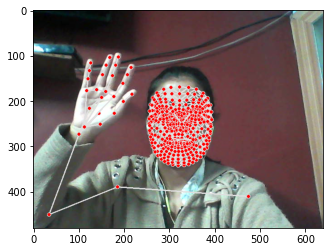

In [17]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

### Extracting Keypoints value

In [12]:
results

mediapipe.python.solution_base.SolutionOutputs

In [13]:
len(results.pose_landmarks.landmark)

33

In [14]:
#creating a place holder for array
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [15]:
pose

[array([ 0.50947672,  0.49551243, -0.76278436,  0.99950552]),
 array([ 0.53627157,  0.44474825, -0.72401726,  0.99890614]),
 array([ 0.5526455 ,  0.44404221, -0.72414595,  0.99862289]),
 array([ 0.56831288,  0.44452864, -0.72458088,  0.99861968]),
 array([ 0.49191961,  0.4507826 , -0.69173038,  0.99913794]),
 array([ 0.48005038,  0.45287687, -0.69130832,  0.99908918]),
 array([ 0.46883717,  0.45534334, -0.69165522,  0.99924785]),
 array([ 0.59698379,  0.47415438, -0.43989134,  0.99867547]),
 array([ 0.46447071,  0.48731396, -0.27601177,  0.99928749]),
 array([ 0.54789031,  0.54810989, -0.66031492,  0.99942762]),
 array([ 0.48989177,  0.54962707, -0.61644197,  0.99957091]),
 array([ 0.74321353,  0.7558881 , -0.35514048,  0.99650013]),
 array([ 0.36517641,  0.74132419, -0.0833393 ,  0.9981882 ]),
 array([ 0.86718911,  1.02090859, -0.39890903,  0.74565399]),
 array([ 0.10070459,  0.79372001, -0.61459911,  0.97473812]),
 array([ 0.90542316,  1.38306546, -0.47711611,  0.47093409]),
 array([

In [16]:
len(pose)

33

In [24]:
#creating the same array folder with for loop in same line with if statement when there is no frame in 
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [17]:
pose.shape

AttributeError: 'list' object has no attribute 'shape'

In [19]:
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten()

In [20]:
#creating blank array so it doesn't throgh error when hand or anything is not in frame(like just above line)
np.zeros(21*3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
len(results.right_hand_landmarks.landmark)*3

63

In [22]:
rh.shape

(63,)

In [23]:
#now checking how many landmarks face has and put this into np.zeros array (above line code)
len(results.face_landmarks.landmark)

468

In [24]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [25]:
result_test = extract_keypoints(results)

In [26]:
result_test

array([ 0.50947672,  0.49551243, -0.76278436, ...,  0.11358708,
        0.21537465, -0.0353829 ])

In [27]:
len(extract_keypoints(results))

1662

In [28]:
33*4+468*3+21*6 #total kepoints

1662

In [29]:
np.save('0', result_test)

In [30]:
np.load('0.npy')

array([ 0.50947672,  0.49551243, -0.76278436, ...,  0.11358708,
        0.21537465, -0.0353829 ])

### setting up folders for collection

In [31]:
#path for exported data in numoy array
DATA_PATH = os.path.join('MP_Data')

#Actions that we r trying to detect
actions = np.array(['Hello', 'Thank you', 'No'])

#for each action 30 videos worth data
no_sequences = 30

#videos are going to be 30 frames in length
sequence_length = 30

In [32]:
#making three folder(thank u,No,hello)and inside that folder making 30 folder to store 30 frame(0-29) 
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

### collecting keypoints value for Training and Testing 

In [138]:
# accessing webcam through mediapipe to take keypoinys
cap=cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    #Loop through the actions
    for action in actions:QQQQ
        #loop through sequence/videos
        for sequence in range(no_sequences):
            #loop through video/sequence length
            for frame_num in range(sequence_length):
                

                #read feed
                ret,frame=cap.read()

                #make Detections
                image, results = mediapipe_detection(frame, holistic)
                print(results)

                #Draw landmarks
                draw_styled_landmarks(image, results)
                
                #apply wait logic so we can get time after each pose
                if frame_num==0:
                    cv2.putText(image, 'STARTING CAPTURING COLLECTION', (50,50),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'capturing frames for {} video number{}' .format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    #show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'capturing frames for {} video number {}' .format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    #show to screen 
                    cv2.imshow('OpenCV Feed', image)
                    
                #export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)


                #break
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()   
    cv2.destroyAllWindows()   #closing the frame

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [73]:
cap.release()   
cv2.destroyAllWindows()   #closing the frame

### preprocessing Data and Create Labels And Features

In [33]:
#allowing this to partitioning the data into training and testing dataset
from sklearn.model_selection import train_test_split
#to convert the data
from tensorflow.keras.utils import to_categorical

In [34]:
import tensorflowjs as tfjs

In [37]:
label_map = {label:num for num, label in enumerate(actions)}

In [38]:
label_map

{'Hello': 0, 'Thank you': 1, 'No': 2}

In [39]:
#building and structuring data
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action]) 

In [40]:
np.array(sequences).shape

(90, 30, 1662)

In [41]:
np.array(labels).shape

(90,)

In [43]:
x = np.array(sequences)

In [44]:
x.shape

(90, 30, 1662)

In [45]:
y = to_categorical(labels).astype(int)

In [46]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05)

In [48]:
x_test.shape

(5, 30, 1662)

### Building and training  the LSTM neural network

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [50]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir= log_dir)

In [51]:
model = Sequential()
model.add(LSTM(64, return_sequences= True, activation = 'relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences= True, activation = 'relu'))
model.add(LSTM(64, return_sequences = False, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(actions.shape[0], activation ='softmax'))

In [77]:
train_test_split?

In [52]:
actions.shape

(3,)

In [53]:
#compile the model
model.compile(optimizer= 'Adam', loss= 'categorical_crossentropy', metrics=['categorical_accuracy'])

In [54]:
model.fit(x_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 8s 192ms/step - loss: 2.9147 - categorical_accuracy: 0.2000
Epoch 2/2000
3/3 [==============================] - 1s 404ms/step - loss: 16.8125 - categorical_accuracy: 0.3412
Epoch 3/2000
3/3 [==============================] - 1s 222ms/step - loss: 24.1979 - categorical_accuracy: 0.2824
Epoch 4/2000
3/3 [==============================] - 1s 193ms/step - loss: 11.8171 - categorical_accuracy: 0.3529
Epoch 5/2000
3/3 [==============================] - 1s 210ms/step - loss: 12.4619 - categorical_accuracy: 0.3294
Epoch 6/2000
3/3 [==============================] - 1s 290ms/step - loss: 41.8877 - categorical_accuracy: 0.2588
Epoch 7/2000
3/3 [==============================] - 1s 275ms/step - loss: 129.1165 - categorical_accuracy: 0.2941
Epoch 8/2000
3/3 [==============================] - 1s 169ms/step - loss: 97.3956 - categorical_accuracy: 0.3647
Epoch 9/2000
3/3 [==============================] - 1s 168ms/step - loss: 59.8716 - categorical_

3/3 [==============================] - 1s 200ms/step - loss: 4.4460 - categorical_accuracy: 0.3294
Epoch 143/2000
3/3 [==============================] - 1s 193ms/step - loss: 7.9117 - categorical_accuracy: 0.3176
Epoch 144/2000
3/3 [==============================] - 1s 191ms/step - loss: 7.9153 - categorical_accuracy: 0.2824
Epoch 145/2000
3/3 [==============================] - 1s 192ms/step - loss: 10.3920 - categorical_accuracy: 0.3765
Epoch 146/2000
3/3 [==============================] - 1s 194ms/step - loss: 10.3590 - categorical_accuracy: 0.3294
Epoch 147/2000
3/3 [==============================] - 1s 180ms/step - loss: 12.7224 - categorical_accuracy: 0.3765
Epoch 148/2000
3/3 [==============================] - 1s 182ms/step - loss: 10.8007 - categorical_accuracy: 0.3412
Epoch 149/2000
3/3 [==============================] - 1s 183ms/step - loss: 6.8891 - categorical_accuracy: 0.3412
Epoch 150/2000
3/3 [==============================] - 1s 197ms/step - loss: 6.9194 - categorical_ac

3/3 [==============================] - 1s 185ms/step - loss: 1.7107 - categorical_accuracy: 0.3765
Epoch 285/2000
3/3 [==============================] - 1s 241ms/step - loss: 1.5537 - categorical_accuracy: 0.3765
Epoch 286/2000
3/3 [==============================] - 1s 212ms/step - loss: 1.9302 - categorical_accuracy: 0.3059
Epoch 287/2000
3/3 [==============================] - 1s 240ms/step - loss: 3.2338 - categorical_accuracy: 0.3647
Epoch 288/2000
3/3 [==============================] - 1s 245ms/step - loss: 2.0540 - categorical_accuracy: 0.4471
Epoch 289/2000
3/3 [==============================] - 1s 223ms/step - loss: 1.6917 - categorical_accuracy: 0.4471
Epoch 290/2000
3/3 [==============================] - 1s 227ms/step - loss: 1.2101 - categorical_accuracy: 0.4235
Epoch 291/2000
3/3 [==============================] - 1s 174ms/step - loss: 0.9481 - categorical_accuracy: 0.6824
Epoch 292/2000
3/3 [==============================] - 1s 175ms/step - loss: 1.1377 - categorical_accura

Epoch 356/2000
3/3 [==============================] - 1s 237ms/step - loss: 0.7748 - categorical_accuracy: 0.6824
Epoch 357/2000
3/3 [==============================] - 1s 231ms/step - loss: 1.0910 - categorical_accuracy: 0.5529
Epoch 358/2000
3/3 [==============================] - 1s 195ms/step - loss: 0.9667 - categorical_accuracy: 0.5647
Epoch 359/2000
3/3 [==============================] - 1s 171ms/step - loss: 0.7984 - categorical_accuracy: 0.6000
Epoch 360/2000
3/3 [==============================] - 1s 175ms/step - loss: 0.8775 - categorical_accuracy: 0.5412
Epoch 361/2000
3/3 [==============================] - 1s 233ms/step - loss: 0.8703 - categorical_accuracy: 0.7294
Epoch 362/2000
3/3 [==============================] - 1s 238ms/step - loss: 0.7018 - categorical_accuracy: 0.7176
Epoch 363/2000
3/3 [==============================] - 1s 216ms/step - loss: 0.8957 - categorical_accuracy: 0.6588
Epoch 364/2000
3/3 [==============================] - 1s 217ms/step - loss: 0.8186 - cat

3/3 [==============================] - 1s 169ms/step - loss: 0.8831 - categorical_accuracy: 0.7412
Epoch 499/2000
3/3 [==============================] - 1s 195ms/step - loss: 0.8405 - categorical_accuracy: 0.6588
Epoch 500/2000
3/3 [==============================] - 1s 191ms/step - loss: 0.7913 - categorical_accuracy: 0.7765
Epoch 501/2000
3/3 [==============================] - 1s 196ms/step - loss: 0.7924 - categorical_accuracy: 0.6824
Epoch 502/2000
3/3 [==============================] - 1s 183ms/step - loss: 1.0862 - categorical_accuracy: 0.5647
Epoch 503/2000
3/3 [==============================] - 1s 194ms/step - loss: 0.8682 - categorical_accuracy: 0.5882
Epoch 504/2000
3/3 [==============================] - 1s 186ms/step - loss: 0.9877 - categorical_accuracy: 0.6706
Epoch 505/2000
3/3 [==============================] - 1s 309ms/step - loss: 0.7514 - categorical_accuracy: 0.7294
Epoch 506/2000
3/3 [==============================] - 1s 305ms/step - loss: 0.8995 - categorical_accura

Epoch 570/2000
3/3 [==============================] - 1s 238ms/step - loss: 0.5464 - categorical_accuracy: 0.8471
Epoch 571/2000
3/3 [==============================] - 1s 210ms/step - loss: 0.6867 - categorical_accuracy: 0.7294
Epoch 572/2000
3/3 [==============================] - 1s 189ms/step - loss: 0.5548 - categorical_accuracy: 0.8353
Epoch 573/2000
3/3 [==============================] - 1s 183ms/step - loss: 0.8596 - categorical_accuracy: 0.6471
Epoch 574/2000
3/3 [==============================] - 1s 237ms/step - loss: 0.8866 - categorical_accuracy: 0.6235
Epoch 575/2000
3/3 [==============================] - 1s 223ms/step - loss: 0.9407 - categorical_accuracy: 0.7529
Epoch 576/2000
3/3 [==============================] - 1s 247ms/step - loss: 0.8112 - categorical_accuracy: 0.6824
Epoch 577/2000
3/3 [==============================] - 1s 244ms/step - loss: 0.7022 - categorical_accuracy: 0.8000
Epoch 578/2000
3/3 [==============================] - 1s 228ms/step - loss: 0.7851 - cat

3/3 [==============================] - 1s 286ms/step - loss: 0.5481 - categorical_accuracy: 0.8235
Epoch 713/2000
3/3 [==============================] - 1s 240ms/step - loss: 0.6078 - categorical_accuracy: 0.8000
Epoch 714/2000
3/3 [==============================] - 1s 190ms/step - loss: 0.5962 - categorical_accuracy: 0.7765
Epoch 715/2000
3/3 [==============================] - 1s 234ms/step - loss: 0.8322 - categorical_accuracy: 0.6941
Epoch 716/2000
3/3 [==============================] - 1s 185ms/step - loss: 1.0185 - categorical_accuracy: 0.6353
Epoch 717/2000
3/3 [==============================] - 1s 326ms/step - loss: 1.0942 - categorical_accuracy: 0.6471
Epoch 718/2000
3/3 [==============================] - 1s 282ms/step - loss: 1.2625 - categorical_accuracy: 0.6353
Epoch 719/2000
3/3 [==============================] - 1s 241ms/step - loss: 0.9550 - categorical_accuracy: 0.7059
Epoch 720/2000
3/3 [==============================] - 1s 246ms/step - loss: 0.7824 - categorical_accura

Epoch 784/2000
3/3 [==============================] - 1s 270ms/step - loss: 1.0678 - categorical_accuracy: 0.6588
Epoch 785/2000
3/3 [==============================] - 1s 290ms/step - loss: 1.0794 - categorical_accuracy: 0.6471
Epoch 786/2000
3/3 [==============================] - 1s 190ms/step - loss: 0.8532 - categorical_accuracy: 0.7059
Epoch 787/2000
3/3 [==============================] - 1s 219ms/step - loss: 0.6259 - categorical_accuracy: 0.8000
Epoch 788/2000
3/3 [==============================] - 1s 228ms/step - loss: 0.5947 - categorical_accuracy: 0.7882
Epoch 789/2000
3/3 [==============================] - 1s 259ms/step - loss: 0.6957 - categorical_accuracy: 0.7882
Epoch 790/2000
3/3 [==============================] - 1s 189ms/step - loss: 0.6447 - categorical_accuracy: 0.8000
Epoch 791/2000
3/3 [==============================] - 1s 255ms/step - loss: 0.6550 - categorical_accuracy: 0.7647
Epoch 792/2000
3/3 [==============================] - 1s 263ms/step - loss: 1.2298 - cat

Epoch 926/2000
3/3 [==============================] - 1s 240ms/step - loss: 0.5122 - categorical_accuracy: 0.8235
Epoch 927/2000
3/3 [==============================] - 1s 222ms/step - loss: 0.4642 - categorical_accuracy: 0.8353
Epoch 928/2000
3/3 [==============================] - 1s 235ms/step - loss: 0.5145 - categorical_accuracy: 0.8000
Epoch 929/2000
3/3 [==============================] - 1s 223ms/step - loss: 0.7089 - categorical_accuracy: 0.8235
Epoch 930/2000
3/3 [==============================] - 1s 219ms/step - loss: 0.4723 - categorical_accuracy: 0.8588
Epoch 931/2000
3/3 [==============================] - 1s 183ms/step - loss: 0.4733 - categorical_accuracy: 0.8353
Epoch 932/2000
3/3 [==============================] - 1s 221ms/step - loss: 0.4305 - categorical_accuracy: 0.8353
Epoch 933/2000
3/3 [==============================] - 1s 230ms/step - loss: 0.4482 - categorical_accuracy: 0.8471
Epoch 934/2000
3/3 [==============================] - 1s 224ms/step - loss: 0.4601 - cat

3/3 [==============================] - 1s 216ms/step - loss: 0.5837 - categorical_accuracy: 0.7647
Epoch 1068/2000
3/3 [==============================] - 1s 191ms/step - loss: 0.9589 - categorical_accuracy: 0.7294
Epoch 1069/2000
3/3 [==============================] - 1s 245ms/step - loss: 0.7836 - categorical_accuracy: 0.7412
Epoch 1070/2000
3/3 [==============================] - 1s 247ms/step - loss: 0.5532 - categorical_accuracy: 0.7765
Epoch 1071/2000
3/3 [==============================] - 1s 289ms/step - loss: 0.9024 - categorical_accuracy: 0.6471
Epoch 1072/2000
3/3 [==============================] - 1s 307ms/step - loss: 1.9873 - categorical_accuracy: 0.5647
Epoch 1073/2000
3/3 [==============================] - 1s 231ms/step - loss: 2.1564 - categorical_accuracy: 0.5647
Epoch 1074/2000
3/3 [==============================] - 1s 187ms/step - loss: 1.1121 - categorical_accuracy: 0.6471
Epoch 1075/2000
3/3 [==============================] - 1s 200ms/step - loss: 1.1210 - categorica

Epoch 1138/2000
3/3 [==============================] - 1s 225ms/step - loss: 0.5480 - categorical_accuracy: 0.8588
Epoch 1139/2000
3/3 [==============================] - 1s 178ms/step - loss: 0.4659 - categorical_accuracy: 0.8471
Epoch 1140/2000
3/3 [==============================] - 1s 249ms/step - loss: 0.5134 - categorical_accuracy: 0.8353
Epoch 1141/2000
3/3 [==============================] - 1s 249ms/step - loss: 0.5920 - categorical_accuracy: 0.8118
Epoch 1142/2000
3/3 [==============================] - 1s 233ms/step - loss: 0.8424 - categorical_accuracy: 0.7529
Epoch 1143/2000
3/3 [==============================] - 1s 199ms/step - loss: 1.0363 - categorical_accuracy: 0.6235
Epoch 1144/2000
3/3 [==============================] - 1s 271ms/step - loss: 0.7296 - categorical_accuracy: 0.7647
Epoch 1145/2000
3/3 [==============================] - 1s 232ms/step - loss: 1.0431 - categorical_accuracy: 0.6706
Epoch 1146/2000
3/3 [==============================] - 1s 225ms/step - loss: 0.6

KeyboardInterrupt: 

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

### Prediction

In [56]:
res = model.predict(x_test)

In [72]:
actions[np.argmax(res[0])]

'Hello'

In [73]:
actions[np.argmax(y_test[0])]

'Hello'

### save model/weights

In [59]:
tfjs.converters.save_keras_model(model, 'models')

In [69]:
model.save('action.h5')

### Evaluation using confusion matrix and accuracy

In [60]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [61]:
yhat = model.predict(x_test)

In [62]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [63]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 1],
        [0, 2]],

       [[4, 0],
        [0, 1]],

       [[3, 0],
        [1, 1]]], dtype=int64)

In [64]:
accuracy_score(ytrue, yhat) # 0.8 means 80%

0.8

### Testing in Real Time

In [65]:
from scipy import stats

In [66]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0,85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [76]:
#new detection variable
sequence = []
sentence = []
predictions = []
thershold = 0.5

cap=cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        #read feed
        ret,frame=cap.read()

        #make Detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        #Draw landmarks
        draw_styled_landmarks(image, results)
        
        #prediction Logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
        #visualizing logic
            if np.unique(predictions[-10:])[0]==np.argmax(res):
                 if res[np.argmax(res)] > thershold:

                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            #visualizing probablity
            image = prob_viz(res, actions, image, colors)
                
        cv2.rectangle(image, (0,0), (640, 40), (245,117,16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30),
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        #show to screen
        cv2.imshow('OpenCV Feed', image)

        #break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()   
    cv2.destroyAllWindows()   #closing the frame

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


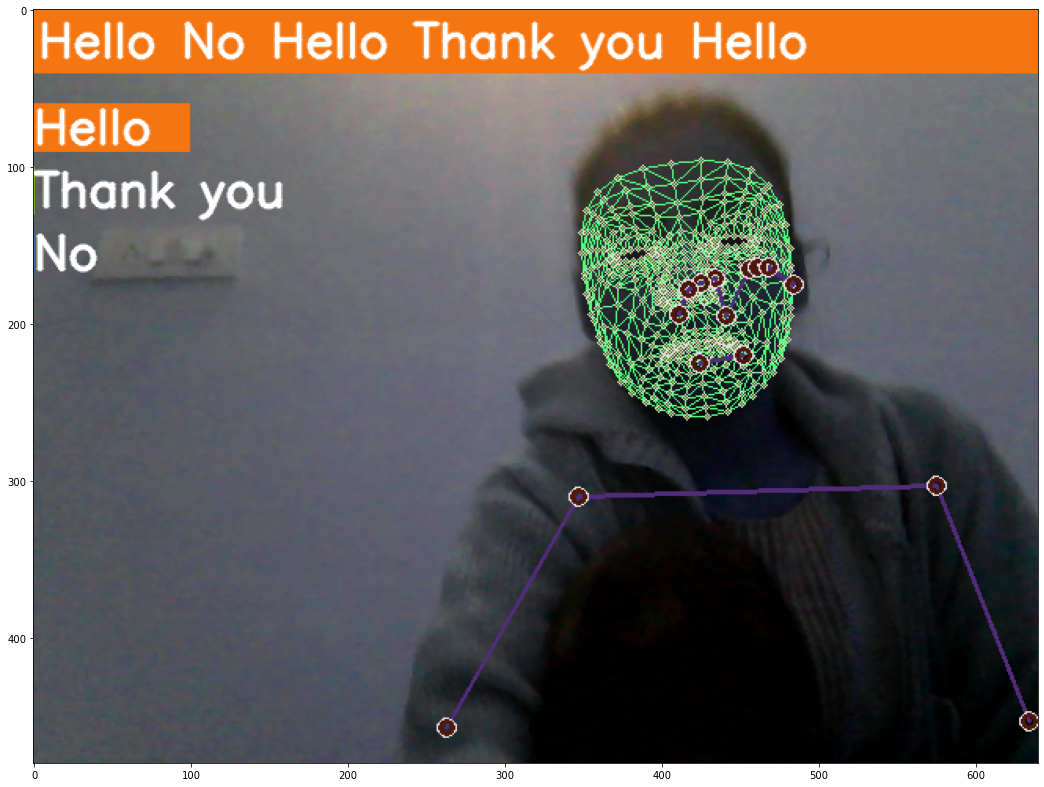

In [68]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [ ]:
cap.release()   
cv2.destroyAllWindows()